<a href="https://colab.research.google.com/github/MiitaliGupta/MachineLearning/blob/main/Obesity%20Prediction%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Obesity Prediction Model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd 
import seaborn as sns
from sklearn import datasets

In [ ]:
data_set= pd.read_csv('https://raw.githubusercontent.com/MiitaliGupta/MachineLearning/main/Datasets/ObesityDataSet_raw_and_data_sinthetic.csv') 
data_set
df = data_set

# Dataset Description : https://www.kaggle.com/datasets/tmcketterick/heights-and-weights

In [ ]:
df

Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE      CH2O  SCC       FAF       TUE  \
0      no   2.0  3.0  Sometimes    no  2.000000   no  0.000000  1.000000   
1      no   3.0  3.0  Sometimes   yes  3.000000  yes  3.000000  0.000000   
2      no   2.0  3.0  Sometimes    no  2.000000   no  2.000000  1.000000   
3      no   3.0  3.0  Sometimes    no  2.000000   no  2.000000  0.000000   
4      no   2.0  1.0  Sometimes    no  2.000000   no  0.000000  0.000000   
...   ...   ...  ...        ...   ...       ...  ...       ...       ...   
2106  yes   3.0  3.0  Sometimes    no  1.728139   no  1.676269  0.906247   
2107  yes   3.0  3.0  Sometimes    no  2.005130   no  1.341390  0.599270   
2108  yes   3.0  3.0  Sometimes    no  2.054193   no  1.414209  0.646288   
2109  yes   3.0  3.0  Sometimes    no  2.852339   no  1.139107  0.586035   
2110  yes   3.0  3.0  Sometimes    no  2.863513   no  1.026452  0.714137   

            CALC                 MTRANS           NObeyesdad  
0             no  Public_Transportation        Normal_Weight  
1      Sometimes  Public_Transportation        Normal_Weight  
2     Frequently  Public_Transportation        Normal_Weight  
3     Frequently                Walking   Overweight_Level_I  
4      Sometimes  Public_Transportation  Overweight_Level_II  
...          ...                    ...                  ...  
2106   Sometimes  Public_Transportation     Obesity_Type_III  
2107   Sometimes  Public_Transportation     Obesity_Type_III  
2108   Sometimes  Public_Transportation     Obesity_Type_III  
2109   Sometimes  Public_Transportation     Obesity_Type_III  
2110   Sometimes  Public_Transportation     Obesity_Type_III  

[2111 rows x 17 columns]

In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [ ]:
df.drop_duplicates(keep='first',inplace=True)

In [ ]:
df.duplicated().value_counts()

False    2087
dtype: int64

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df["Gender"] = ord_enc.fit_transform(df[["Gender"]])
df["family_history_with_overweight"] = ord_enc.fit_transform(df[["family_history_with_overweight"]])
df["FAVC"] = ord_enc.fit_transform(df[["FAVC"]])
df["CAEC"] = ord_enc.fit_transform(df[["CAEC"]])
df["SMOKE"] = ord_enc.fit_transform(df[["SMOKE"]])
df["SCC"] = ord_enc.fit_transform(df[["SCC"]])
df["CALC"] = ord_enc.fit_transform(df[["CALC"]])
df["MTRANS"] = ord_enc.fit_transform(df[["MTRANS"]])
df

Gender        Age    Height      Weight  family_history_with_overweight  \
0        0.0  21.000000  1.620000   64.000000                             1.0   
1        0.0  21.000000  1.520000   56.000000                             1.0   
2        1.0  23.000000  1.800000   77.000000                             1.0   
3        1.0  27.000000  1.800000   87.000000                             0.0   
4        1.0  22.000000  1.780000   89.800000                             0.0   
...      ...        ...       ...         ...                             ...   
2106     0.0  20.976842  1.710730  131.408528                             1.0   
2107     0.0  21.982942  1.748584  133.742943                             1.0   
2108     0.0  22.524036  1.752206  133.689352                             1.0   
2109     0.0  24.361936  1.739450  133.346641                             1.0   
2110     0.0  23.664709  1.738836  133.472641                             1.0   

      FAVC  FCVC  NCP  CAEC  SMOKE      CH2O  SCC       FAF       TUE  CALC  \
0      0.0   2.0  3.0   2.0    0.0  2.000000  0.0  0.000000  1.000000   3.0   
1      0.0   3.0  3.0   2.0    1.0  3.000000  1.0  3.000000  0.000000   2.0   
2      0.0   2.0  3.0   2.0    0.0  2.000000  0.0  2.000000  1.000000   1.0   
3      0.0   3.0  3.0   2.0    0.0  2.000000  0.0  2.000000  0.000000   1.0   
4      0.0   2.0  1.0   2.0    0.0  2.000000  0.0  0.000000  0.000000   2.0   
...    ...   ...  ...   ...    ...       ...  ...       ...       ...   ...   
2106   1.0   3.0  3.0   2.0    0.0  1.728139  0.0  1.676269  0.906247   2.0   
2107   1.0   3.0  3.0   2.0    0.0  2.005130  0.0  1.341390  0.599270   2.0   
2108   1.0   3.0  3.0   2.0    0.0  2.054193  0.0  1.414209  0.646288   2.0   
2109   1.0   3.0  3.0   2.0    0.0  2.852339  0.0  1.139107  0.586035   2.0   
2110   1.0   3.0  3.0   2.0    0.0  2.863513  0.0  1.026452  0.714137   2.0   

      MTRANS           NObeyesdad  
0        3.0        Normal_Weight  
1        3.0        Normal_Weight  
2        3.0        Normal_Weight  
3        4.0   Overweight_Level_I  
4        3.0  Overweight_Level_II  
...      ...                  ...  
2106     3.0     Obesity_Type_III  
2107     3.0     Obesity_Type_III  
2108     3.0     Obesity_Type_III  
2109     3.0     Obesity_Type_III  
2110     3.0     Obesity_Type_III  

[2087 rows x 17 columns]

In [ ]:
df["NObeyesdad"] = df["NObeyesdad"].map({"Normal_Weight": 0, "Overweight_Level_I": 1, "Overweight_Level_II": 2, "Obesity_Type_I": 3, "Obesity_Type_II": 4, "Obesity_Type_III": 5})

In [ ]:
#Independent Variable (Height)
# x= data_set.iloc[:0,16].values 
#x=data_set.drop(columns=['NObeyesdad', 'MTRANS', 'TUE', 'NCP', 'FCVC', 'Height', 'Gender', 'Age', 'FAVC', 'CAEC', 'SMOKE', 'CH2O', 'CALC'], axis=1)
#Dependent Variable (Weight) 
#y= data_set.iloc[:,16].values  
#print(x) 

# y=df['NObeyesdad']
# y

X=df.drop(columns=['NObeyesdad', 'MTRANS', 'TUE', 'NCP', 'FCVC', 'Height', 'Gender', 'Age', 'FAVC', 'CAEC', 'SMOKE', 'CH2O', 'CALC'], axis=1)
X

Weight  family_history_with_overweight  SCC       FAF
0      64.000000                             1.0  0.0  0.000000
1      56.000000                             1.0  1.0  3.000000
2      77.000000                             1.0  0.0  2.000000
3      87.000000                             0.0  0.0  2.000000
4      89.800000                             0.0  0.0  0.000000
...          ...                             ...  ...       ...
2106  131.408528                             1.0  0.0  1.676269
2107  133.742943                             1.0  0.0  1.341390
2108  133.689352                             1.0  0.0  1.414209
2109  133.346641                             1.0  0.0  1.139107
2110  133.472641                             1.0  0.0  1.026452

[2087 rows x 4 columns]

In [ ]:
y=df['NObeyesdad']
y

0       0.0
1       0.0
2       0.0
3       1.0
4       2.0
       ... 
2106    5.0
2107    5.0
2108    5.0
2109    5.0
2110    5.0
Name: NObeyesdad, Length: 2087, dtype: float64

##Preprocessing

Encoding character values

**Visualization**

**Correlation**

The below heatmap shows the degree of correlation between all the variables in the dataset

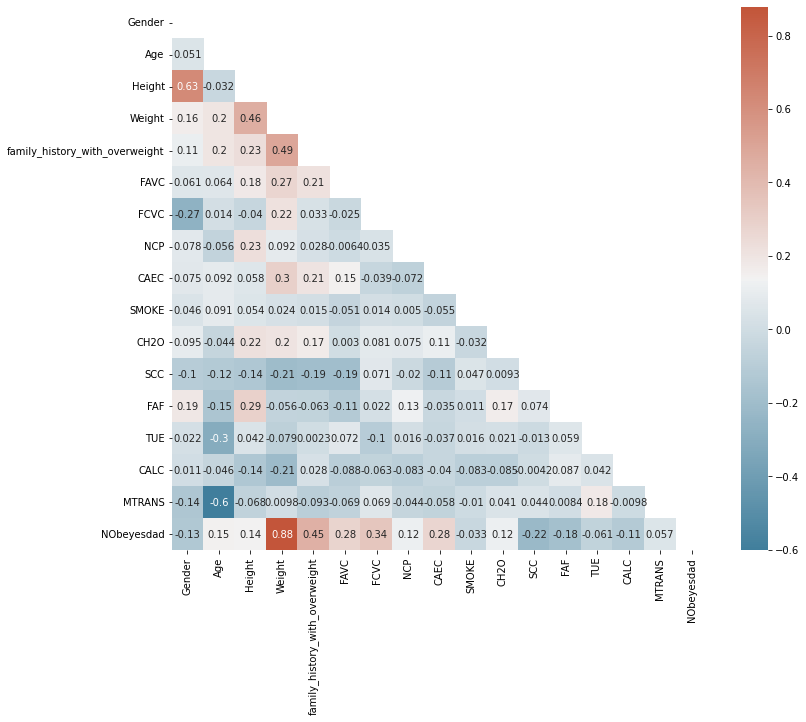

In [ ]:

corr = df.corr()
#
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(12, 10))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

#data_set

In [ ]:
!pip3 install pandas_profiling --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached MarkupSafe-2.1.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (25 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.0.1
    Uninstalling MarkupSafe-2.0.1:
      Successfully uninstalled MarkupSafe-2.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached MarkupSafe-2.0.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (31 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
from pandas_profiling import ProfileReport
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Constructing a model**

Splitting the dataset into training and testing sets in a 80:20 ratio

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

In [ ]:
df.dropna(subset=['NObeyesdad'], inplace=True)

In [ ]:
x_train.count()

Weight                            1773
family_history_with_overweight    1773
SCC                               1773
FAF                               1773
dtype: int64

In [ ]:
y_train.isna().sum()

229

In [ ]:
y_train

300     0.0
1661    4.0
1996    5.0
1539    4.0
1740    4.0
       ... 
1057    2.0
1755    4.0
778     1.0
856     1.0
1677    4.0
Name: NObeyesdad, Length: 1773, dtype: float64

In [ ]:
mean=y_train.mean()
y_train.fillna(mean, inplace=True)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

Storing the predicted values in y_pred

In [ ]:
y_pred = regressor.predict(x_test)

In [ ]:
y_train_pred = regressor.predict(x_train)

Creating a dataframe of predicted and test values for better comparison

In [ ]:
d = {'y_pred': y_pred, 'y_test': y_test}

In [ ]:
pd.DataFrame(d)

y_pred  y_test
305   3.852043     4.0
386   1.203725     0.0
1021  1.714489     2.0
1625  3.748740     4.0
270   3.826442     3.0
...        ...     ...
583   1.026618     NaN
487   2.922646     3.0
1204  2.499977     2.0
1108  1.606282     2.0
266   1.286462     NaN

[314 rows x 2 columns]

**RMSE**



The root-mean-square error (RMSE) is a frequently used measure of the differences between values (sample and population values) predicted by a model and the values actually observed. 

The RMSE for training and test sets should be **very similar** if we have built a good model. If the RMSE for the test set is much higher than that of the training set, it is likely that we’ve badly overfit the data.

It is in absolute terms




In [ ]:
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

RMSE: 1.0490762736135055


In [ ]:
y_test.isna().sum()

38

In [ ]:
mean=y_test.mean()
y_test.fillna(mean, inplace=True)

In [ ]:
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE: 1.0469444039388585


After Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_train)

[[-0.63471569 -2.17240761 -0.22578323 -1.18917678]
 [ 1.33782342  0.46031877 -0.22578323  0.32704763]
 [ 1.86515034  0.46031877 -0.22578323  0.10192312]
 ...
 [-0.16936673  0.46031877 -0.22578323 -0.91122154]
 [-0.47321629  0.46031877 -0.22578323  0.84306393]
 [ 1.42286677  0.46031877 -0.22578323 -0.01563284]]


Fitting the data into the model

In [ ]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(x_test)

In [ ]:
y_train_pred = regressor.predict(x_train)

In [ ]:
d = {'y_pred': y_pred, 'y_test': y_test}

In [ ]:
pd.DataFrame(d)

y_pred    y_test
305   3.852043  4.000000
386   1.203725  0.000000
1021  1.714489  2.000000
1625  3.748740  4.000000
270   3.826442  3.000000
...        ...       ...
583   1.026618  2.612319
487   2.922646  3.000000
1204  2.499977  2.000000
1108  1.606282  2.000000
266   1.286462  2.612319

[314 rows x 2 columns]

In [ ]:
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

RMSE: 1.0490762736135053


In [ ]:
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE: 1.0469444039388582
